# Exploring Realstate Sales Prices

In [1]:
%pip install mpld3
%pip install seaborn
%pip install friendly

In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import friendly

`DeprecationWarning`: Use setlocale(), getencoding() and getlocale() instead


## 1. Exploration

### Question 1

Load the titanic using `pandas`. It is located in `datasets/ames_housing.csv`. Using the function `head()` and `info()`, which issues do you identify which need to be noted before to learn a machine learning model.

The dataset is described in https://www.kaggle.com/datasets/prevek18/ames-housing-dataset

In [3]:
data = pd.read_csv('datasets/ames_housing.csv')
data.head()

`DeprecationWarning`: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.


,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


### Question 2

- Identify the target variable: "SalePrice", what's its type? What are its distributionals characteristics?
- What variables contain more missing values?

In [4]:
data['SalePrice'].describe()

count      2930.000000
mean     180796.060068
std       79886.692357
min       12789.000000
25%      129500.000000
50%      160000.000000
75%      213500.000000
max      755000.000000
Name: SalePrice, dtype: float64

<AxesSubplot:>

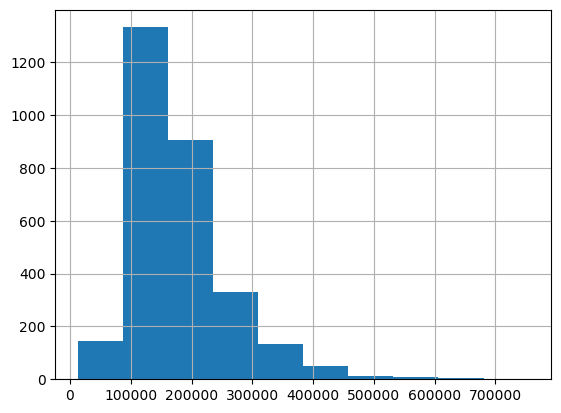

In [5]:
data['SalePrice'].hist()

## Question 3
Split the data into features and target variables.
Then, the data into a model selection, sample and a model evaluation sample. Use `sklearn.model_selection.train_test_split`.
Use a 20% ratio.

In [6]:
from sklearn.model_selection import train_test_split
target = data["SalePrice"]
features = data.drop(columns="SalePrice")

selection_features, evaluation_features, selection_target, evaluation_target = train_test_split(
    features, target, test_size=.2
)
selection_target.shape

(2344,)

In [7]:
print("Ratio of elements in the selection set by total", len(selection_target) / len(target))
print("Ration of elements in the evaluation set by total", len(evaluation_target) / len(target))

Ratio of elements in the selection set by total 0.8
Ration of elements in the evaluation set by total 0.2


## Question 4
Extract the columns with numerical data using `selection_features.select_dtypes("number")`. Examine their distributions, through histograms. What issues do you identify? Then use  `selection_features.select_dtypes("object")` and seaborn's `sns.countplot` to analyze the string variables. Identify data types and issues.

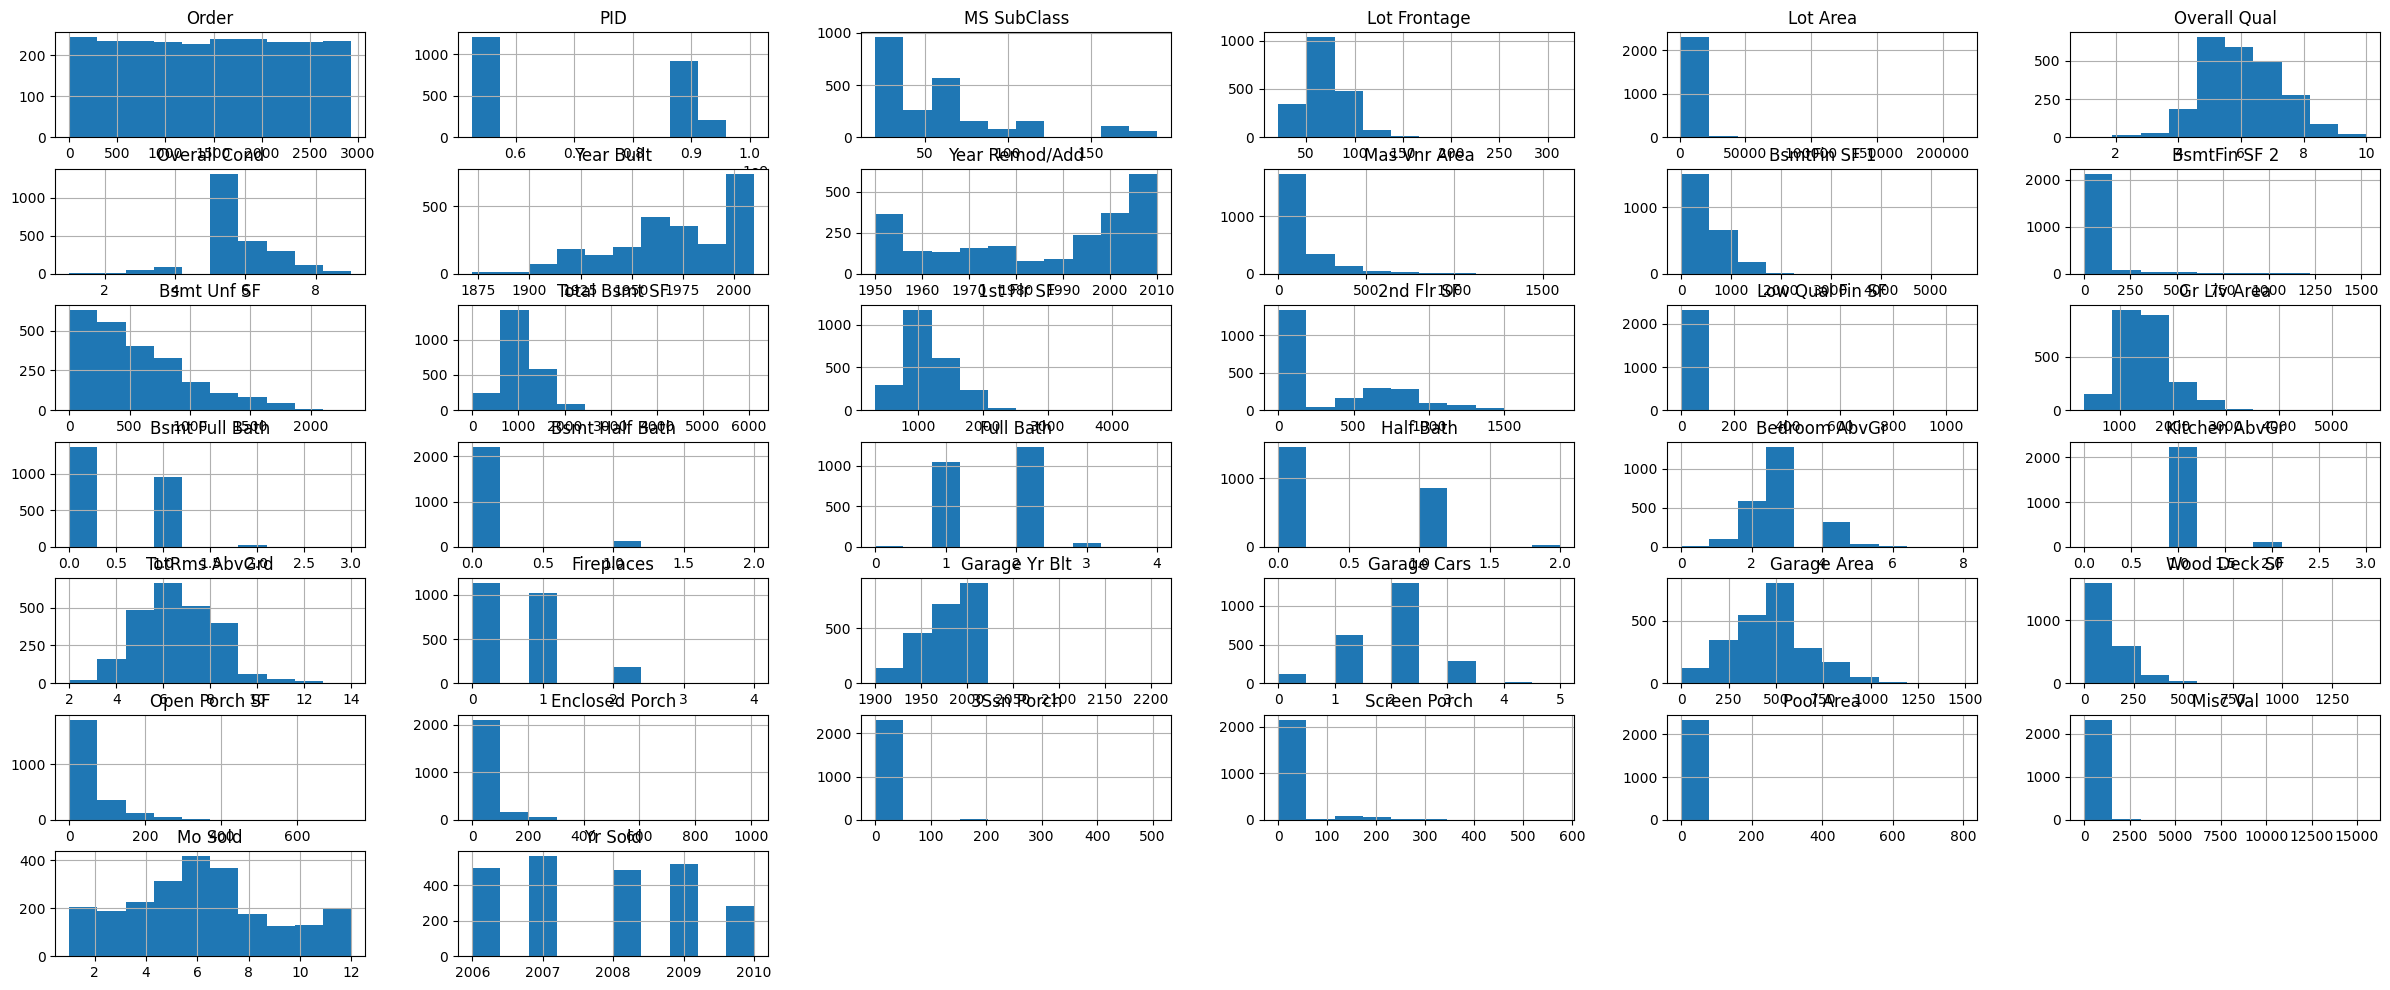

In [8]:
numeric_features = selection_features.select_dtypes("number")
numeric_features.hist(figsize=(30, 12));

In [9]:
selection_features.select_dtypes("object").describe()

,MS Zoning,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,...,Garage Type,Garage Finish,Garage Qual,Garage Cond,Paved Drive,Pool QC,Fence,Misc Feature,Sale Type,Sale Condition
count,2344,2344,158,2344,2344,2344,2344,2344,2344,2344,...,2218,2217,2217,2217,2344,8,457,93,2344,2344
unique,7,2,2,4,4,2,5,3,28,9,...,6,3,5,4,3,3,4,4,10,6
top,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,Attchd,Unf,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
freq,1822,2334,92,1478,2099,2342,1717,2222,353,2017,...,1390,986,2098,2131,2120,4,260,85,2037,1938


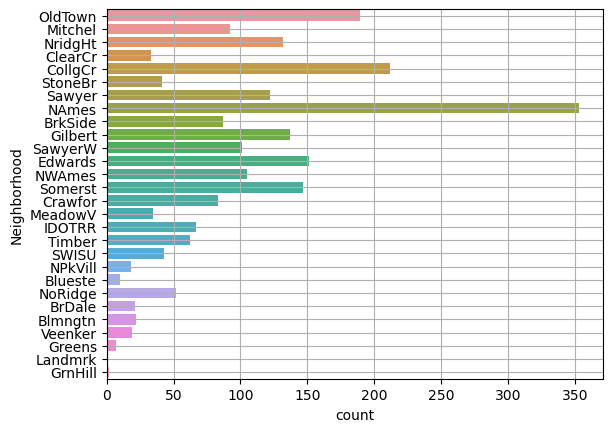

In [10]:
sns.countplot(
    y=selection_features.select_dtypes("object").columns[8],
    data=selection_features.select_dtypes("object")
)
plt.grid()

# Section 2: Implement a linear regressor using only the numerical variables

### Question 1
Use a Column Transformer to _just select_ the numerical variables. Build a linear regressor using `sklearn.linear.LinearRegressor

For this we will
* build the column transformer
* build the machine learning pipeline
* evaluate it trough cross-validation (using `cross_vals_score`)

Does it work? Why?

In [11]:
from sklearn.linear_model import LinearRegression
from sklearn.compose import make_column_selector, make_column_transformer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score, mean_absolute_error, mean_absolute_percentage_error

array([-0.19664868, -0.18565844, -0.1827155 , -0.16732273, -0.18485842])

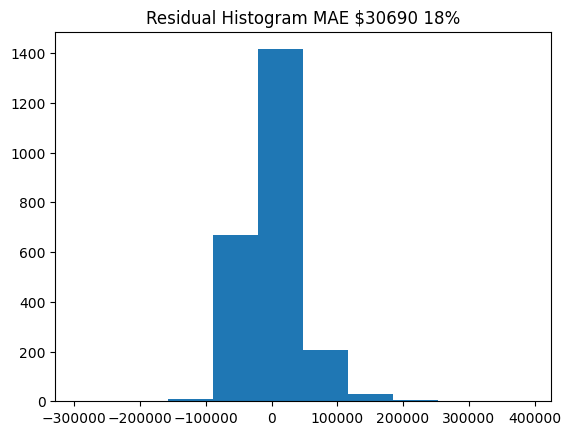

In [12]:
# Build the preprocessing
preprocessing = make_column_transformer(
    (StandardScaler(), ['Lot Area', 'Year Built']),
    ('passthrough', ['Overall Qual']),
)

# Build a pipeline with the preprocessing and a linear regression model
pipeline = make_pipeline(preprocessing, LinearRegression())

# Train or fit the model
pipeline.fit(selection_features, selection_target)

# Predict and analyse the prediction error
prediction = pipeline.predict(selection_features)
plt.hist(selection_target - prediction);
plt.title(
    f"Residual Histogram MAE ${mean_absolute_error(selection_target, prediction):.0f} "
    f"{mean_absolute_percentage_error(selection_target, prediction) * 100:.0f}%"
)
cross_val_score(pipeline, selection_features, selection_target, scoring='neg_mean_absolute_percentage_error')

### Question 2
Fix the previous issue using, first dropping the problemating rows, then using the `SimpleImputer`


In [13]:
from sklearn.impute import SimpleImputer

In [14]:
# Build the preprocessing
preprocessing = make_column_transformer(
    (
        make_pipeline(SimpleImputer(strategy='mean'), StandardScaler()),
        selection_features.select_dtypes("number").columns
    ),
)

# Build a pipeline with the preprocessing and a linear regression model
pipeline = make_pipeline(preprocessing, LinearRegression())

# Cross-validate and analyse the prediction error
cross_val_score(
    pipeline, selection_features, selection_target,
    scoring='neg_mean_absolute_percentage_error',
    cv=100 // 20
)

array([-0.12365007, -0.12838263, -0.13226178, -0.11821344, -0.12917765])

### Question 3
Now plot the evolution of mean and standard deviations for test sample sizes of 05%, 10%, 20%, 25%, 30%. What do you conclude?


In [15]:
cv_05 = cross_val_score(
    pipeline, selection_features, selection_target,
    scoring='neg_mean_absolute_percentage_error',
    cv=100 // 5
)

cv_10 = cross_val_score(
    pipeline, selection_features, selection_target,
    scoring='neg_mean_absolute_percentage_error',
    cv=100 // 10
)

cv_20 = cross_val_score(
    pipeline, selection_features, selection_target,
    scoring='neg_mean_absolute_percentage_error',
    cv=100 // 20
)

cv_25 = cross_val_score(
    pipeline, selection_features, selection_target,
    scoring='neg_mean_absolute_percentage_error',
    cv=100 // 25
)

cv_30 = cross_val_score(
    pipeline, selection_features, selection_target,
    scoring='neg_mean_absolute_percentage_error',
    cv=100 // 30
)

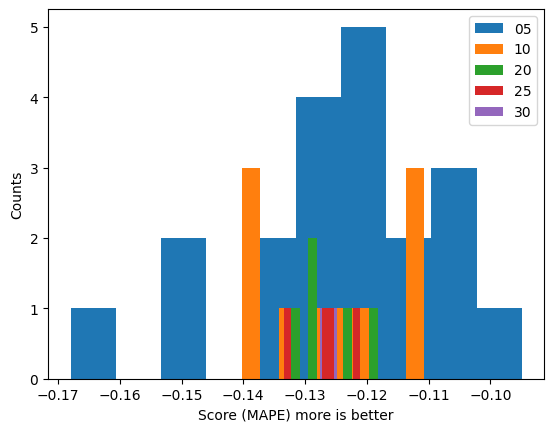

In [16]:
plt.hist(cv_05, label="05")
plt.hist(cv_10, label="10")
plt.hist(cv_20, label="20")
plt.hist(cv_25, label="25")
plt.hist(cv_30, label="30")
plt.ylabel("Counts")
plt.xlabel("Score (MAPE) more is better")
plt.legend()

### Question 4
Use `sklearn.model_selection.learning_curve` to study the learning curve https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.learning_curve.html?highlight=learning_curve

In [17]:
from sklearn.model_selection import learning_curve

In [20]:
lr_results = learning_curve(
    pipeline, selection_features, selection_target,
    scoring='neg_mean_absolute_percentage_error',
    train_sizes=[0.1  , 0.325, 0.55 , 0.775, 1.   ],
    cv=10
)

Text(0, 0.5, 'Mean absoute percentage error (smaller is better)')

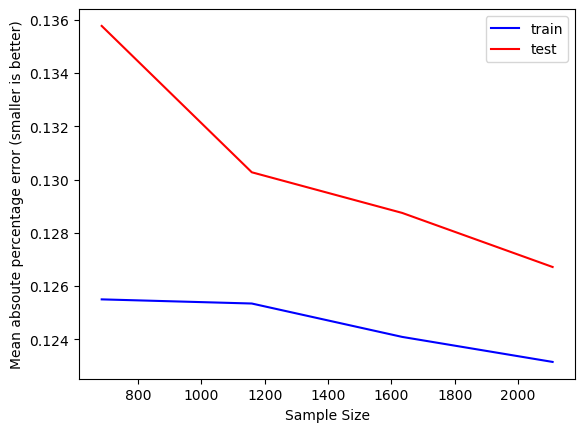

In [25]:
train_sizes, train_scores, test_scores = lr_results
plt.plot(train_sizes[1:], -np.mean(train_scores, axis=1)[1:], c='b', label='train');
plt.plot(train_sizes[1:], -np.mean(test_scores, axis=1)[1:], c='r', label='test');
plt.legend()
plt.xlabel("Sample Size")
plt.ylabel("Mean absoute percentage error (smaller is better)")

### Question 5
Are there corrleations between the features? Explore it through the correlation matrix, and the `sns.pairplot` plotting tool from seaborn (warning, if you plot all variables together it might be slow)

### Question 6
Can we use this correlation to improve the learning curve? This is regularization, let's try ridge regression https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html

Plot the learning curve and compare it with the plain linear regression

In [21]:
from sklearn.linear_model import Ridge

### Question 6.1
How did you pick your regularization parameter? Use a grid search now. https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html


In [22]:
from sklearn.model_selection import GridSearchCV

### Question 7
Do we need all features? Repeat the previous analysis from Question 6 but with the Lasso which enforces sparsity https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html

### Question 8

Now we will repeat the same analysis but with the categorical variables. For which we will use the `OneHotEncoder` and the `OrdinalEncoder` 
* https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html 
* https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OrdinalEncoder.html

and combine them in the preprocessing pipeline in Section 2, Questions 1 and 2.

In [23]:
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder

## Question 9

Non linearity! Now use the RandomForestRegressor https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html to fit and predict the data. The two hyper-parameters that you will use are 

* n_estimators : with a default of 100 which deals with the uncertainty in the data/algorithm relationship.
* max_depth : with a no limit as a default which deals with the granularity of the solution.

Use a Grid search cross validation to set the two parameters. Plot the learning curve.

In [24]:
from sklearn.ensemble import RandomForestClassifier

## Question 10

We will now use the data to obtain 
Use permutation feature importance to assess which are the most important features in predicting house pricing https://scikit-learn.org/stable/modules/permutation_importance.html

Compare these importances across models.

In [25]:
from sklearn.inspection import permutation_importance

## Question 11

Pick one of the estimators. Use cross_val_predict to evaluate the quality of the prediction in different cases.

https://scikit-learn.org/stable/auto_examples/model_selection/plot_cv_predict.html#sphx-glr-auto-examples-model-selection-plot-cv-predict-py

Cross-val predict will give you for each element in the target, a prediction. Produce a scatterplot between target and prediction, use the trained model and the predictive importance to find the most explanatory variables.

In [28]:
from sklearn.model_selection import cross_val_predict


# Section 3: Analyzing our phenomenon.

Now that we have picked one model: